# Clase 04 - Datos multidimensionales, de jerarquía y de flujo

Profesor: **Fernando Becerra**, f.becerra@udd.cl, [www.fernandobecerra.com](www.fernandobecerra.com)

Esta semana expanderemos más nuestro conocimiento de distintos tipos de gráficos para los casos de datos multidimensionales, de jerarquía y de flujo.

Comencemos importando lo mismo de siempre.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Datos multidimensionales

Cuando tenemos datos que tienen más de 3 ó 4 propiedades, gráficos como el de barra o el de dispersión quedan cortos y no son suficiente, es por eso que usamos otras técnicas de representación para ver todas las variables al mismo tiempo y explorar si hay alguna relación entre ellas.

Las coordenadas paralelas y la matriz de diagramas de dispersión las importamos desde `pandas`.

In [2]:
from pandas.plotting import parallel_coordinates, scatter_matrix

### Coordenadas paralelas

Cargamos datos estándar desde `seaborn`

In [3]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Y ocupamos las coordenadas paralelas de `pandas`

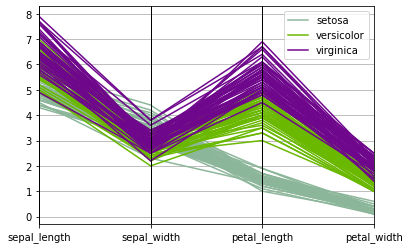

In [4]:
ax = parallel_coordinates(data, 'species')

No es el mejor gráfico, pero se ve bien. Probemos con otra serie de datos

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/fbecerra/ex2/master/data/exoplanets.csv")
data.head()

,NAME,SIMBADNAME,SIMBADURL,DATE,MASS,R,BMV,MSTAR,RSTAR,TEFF,A,PER,ECC,DIST,NCOMP,PLANETDISCMETH
0,Kepler-107 d,Kepler-107,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2014,0.003712,0.095459,NaN,NaN,1.411,5851.0,0.078010,7.958203,NaN,NaN,4,Transit
1,Kepler-427 b,2MASS J19130109+4342175,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2010,0.290000,1.230000,NaN,0.960,1.350,5800.0,0.091351,10.290994,0.000,1100.0,1,Transit
2,WASP-14 b,BD+22 2716,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2009,7.692340,1.281000,0.46,1.310,1.310,6475.0,0.036769,2.243752,0.091,160.0,1,Transit
3,Kepler-50 b,Kepler-50,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2011,0.016491,0.196096,0.48,1.230,1.880,6058.0,0.082560,7.812512,NaN,NaN,2,Transit
4,Kepler-20 b,Kepler-20,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2011,0.026665,0.170247,0.90,0.912,0.944,5466.0,0.045370,3.696122,0.000,290.0,5,Transit


Filtremos sólo las columnas que nos interesan

In [6]:
df = data[['MASS', 'R', 'BMV', 'MSTAR', 'RSTAR', 'TEFF', 'A', 'PER', 'ECC', 'DIST', 'PLANETDISCMETH']].dropna().reset_index(drop=True)
df.head()

,MASS,R,BMV,MSTAR,RSTAR,TEFF,A,PER,ECC,DIST,PLANETDISCMETH
0,7.692340,1.281000,0.460000,1.310,1.310,6475.0,0.036769,2.243752,0.091000,160.000,Transit
1,0.026665,0.170247,0.900000,0.912,0.944,5466.0,0.045370,3.696122,0.000000,290.000,Transit
2,0.617485,1.020000,0.990000,0.920,0.870,5190.0,0.039949,3.039577,0.000000,204.000,Transit
3,0.300272,1.070000,0.540000,1.010,1.060,5800.0,0.052109,4.322482,0.000000,242.131,Transit
4,0.000000,0.116766,0.599999,0.690,0.640,4925.0,0.055279,5.714932,0.070711,368.000,Transit


Y probemos las coordenada paralelas

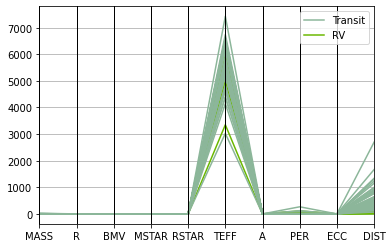

In [7]:
ax = parallel_coordinates(df, 'PLANETDISCMETH')

Lamentablemente este método tiene varios problemas. Entre otros, el principal es que no se pueden ajustar las escalas del eje y para las distintas columnas. Para resolver eso, usaremos una función especial para crear coordenadas paralelas sacada de [acá](http://benalexkeen.com/parallel-coordinates-in-matplotlib/).

In [8]:
from matplotlib import ticker

def plot_parallel_coordinates(df, cat_col, cols, colours):
    
    x = [i for i, _ in enumerate(cols)]

    # Create (X-1) sublots along x axis
    fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

    # Get min, max and range for each column
    # Normalize the data for each column
    min_max_range = {}
    for col in cols:
        min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
        df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

    # Plot each row
    for i, ax in enumerate(axes):
        for idx in df.index:
            mpg_category = df.loc[idx, cat_col]
            ax.plot(x, df.loc[idx, cols], colours[mpg_category])
        ax.set_xlim([x[i], x[i+1]])

    # Set the tick positions and labels on y axis for each plot
    # Tick positions based on normalised data
    # Tick labels are based on original data
    def set_ticks_for_axis(dim, ax, ticks):
        min_val, max_val, val_range = min_max_range[cols[dim]]
        step = val_range / float(ticks-1)
        tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
        norm_min = df[cols[dim]].min()
        norm_range = np.ptp(df[cols[dim]])
        norm_step = norm_range / float(ticks-1)
        ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
        ax.yaxis.set_ticks(ticks)
        ax.set_yticklabels(tick_labels)

    for dim, ax in enumerate(axes):
        ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
        set_ticks_for_axis(dim, ax, ticks=6)
        ax.set_xticklabels([cols[dim]])


    # Move the final axis' ticks to the right-hand side
    ax = plt.twinx(axes[-1])
    dim = len(axes)
    ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[-2], cols[-1]])


    # Remove space between subplots
    plt.subplots_adjust(wspace=0)

    # Add legend to plot
    plt.legend(
        [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df[cat_col].cat.categories],
        df[cat_col].cat.categories,
        bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

    return fig, ax

Ahora definimos las variables que nos pide la función, entre ellas: el dataframe, la columna que ocuparemos como categoría, las columnas que queremos graficas, y los colores de las categorías en forma de diccionario.

In [9]:
cat_col = 'PLANETDISCMETH'
cols = ['MASS', 'R', 'BMV', 'MSTAR', 'RSTAR', 'TEFF', 'A', 'PER', 'ECC', 'DIST']

colours = ['#2e8ad8', '#cd3785']
df[cat_col] = df[cat_col].astype('category')

colours = {df[cat_col].cat.categories[i]: colours[i] for i, _ in enumerate(df[cat_col].cat.categories)}
colours

{'RV': '#2e8ad8', 'Transit': '#cd3785'}

Y ocupamos la función ya definida

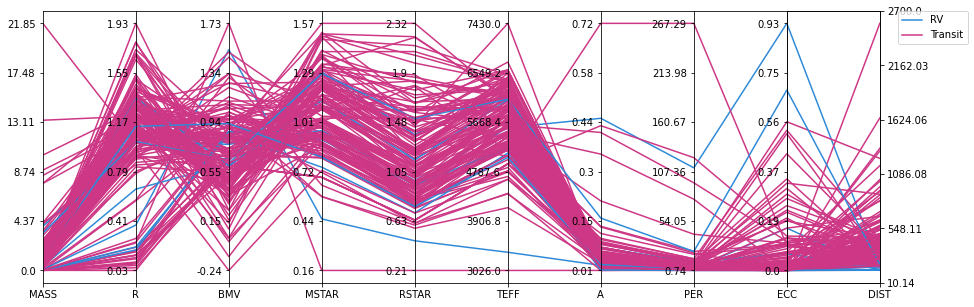

In [10]:
fig, ax = plot_parallel_coordinates(df, cat_col, cols, colours)

Como nos devuelve la `fig` y el `ax`, podemos seguir haciéndole otras modificaciones como agregar título y otras.

### Matrices

Otra forma de graficar datos multidimensionales es crear una matriz de relaciones entre todas las variables a ocupar. Para esto, ocuparemos la función `PairGrid` de `seaborn`.

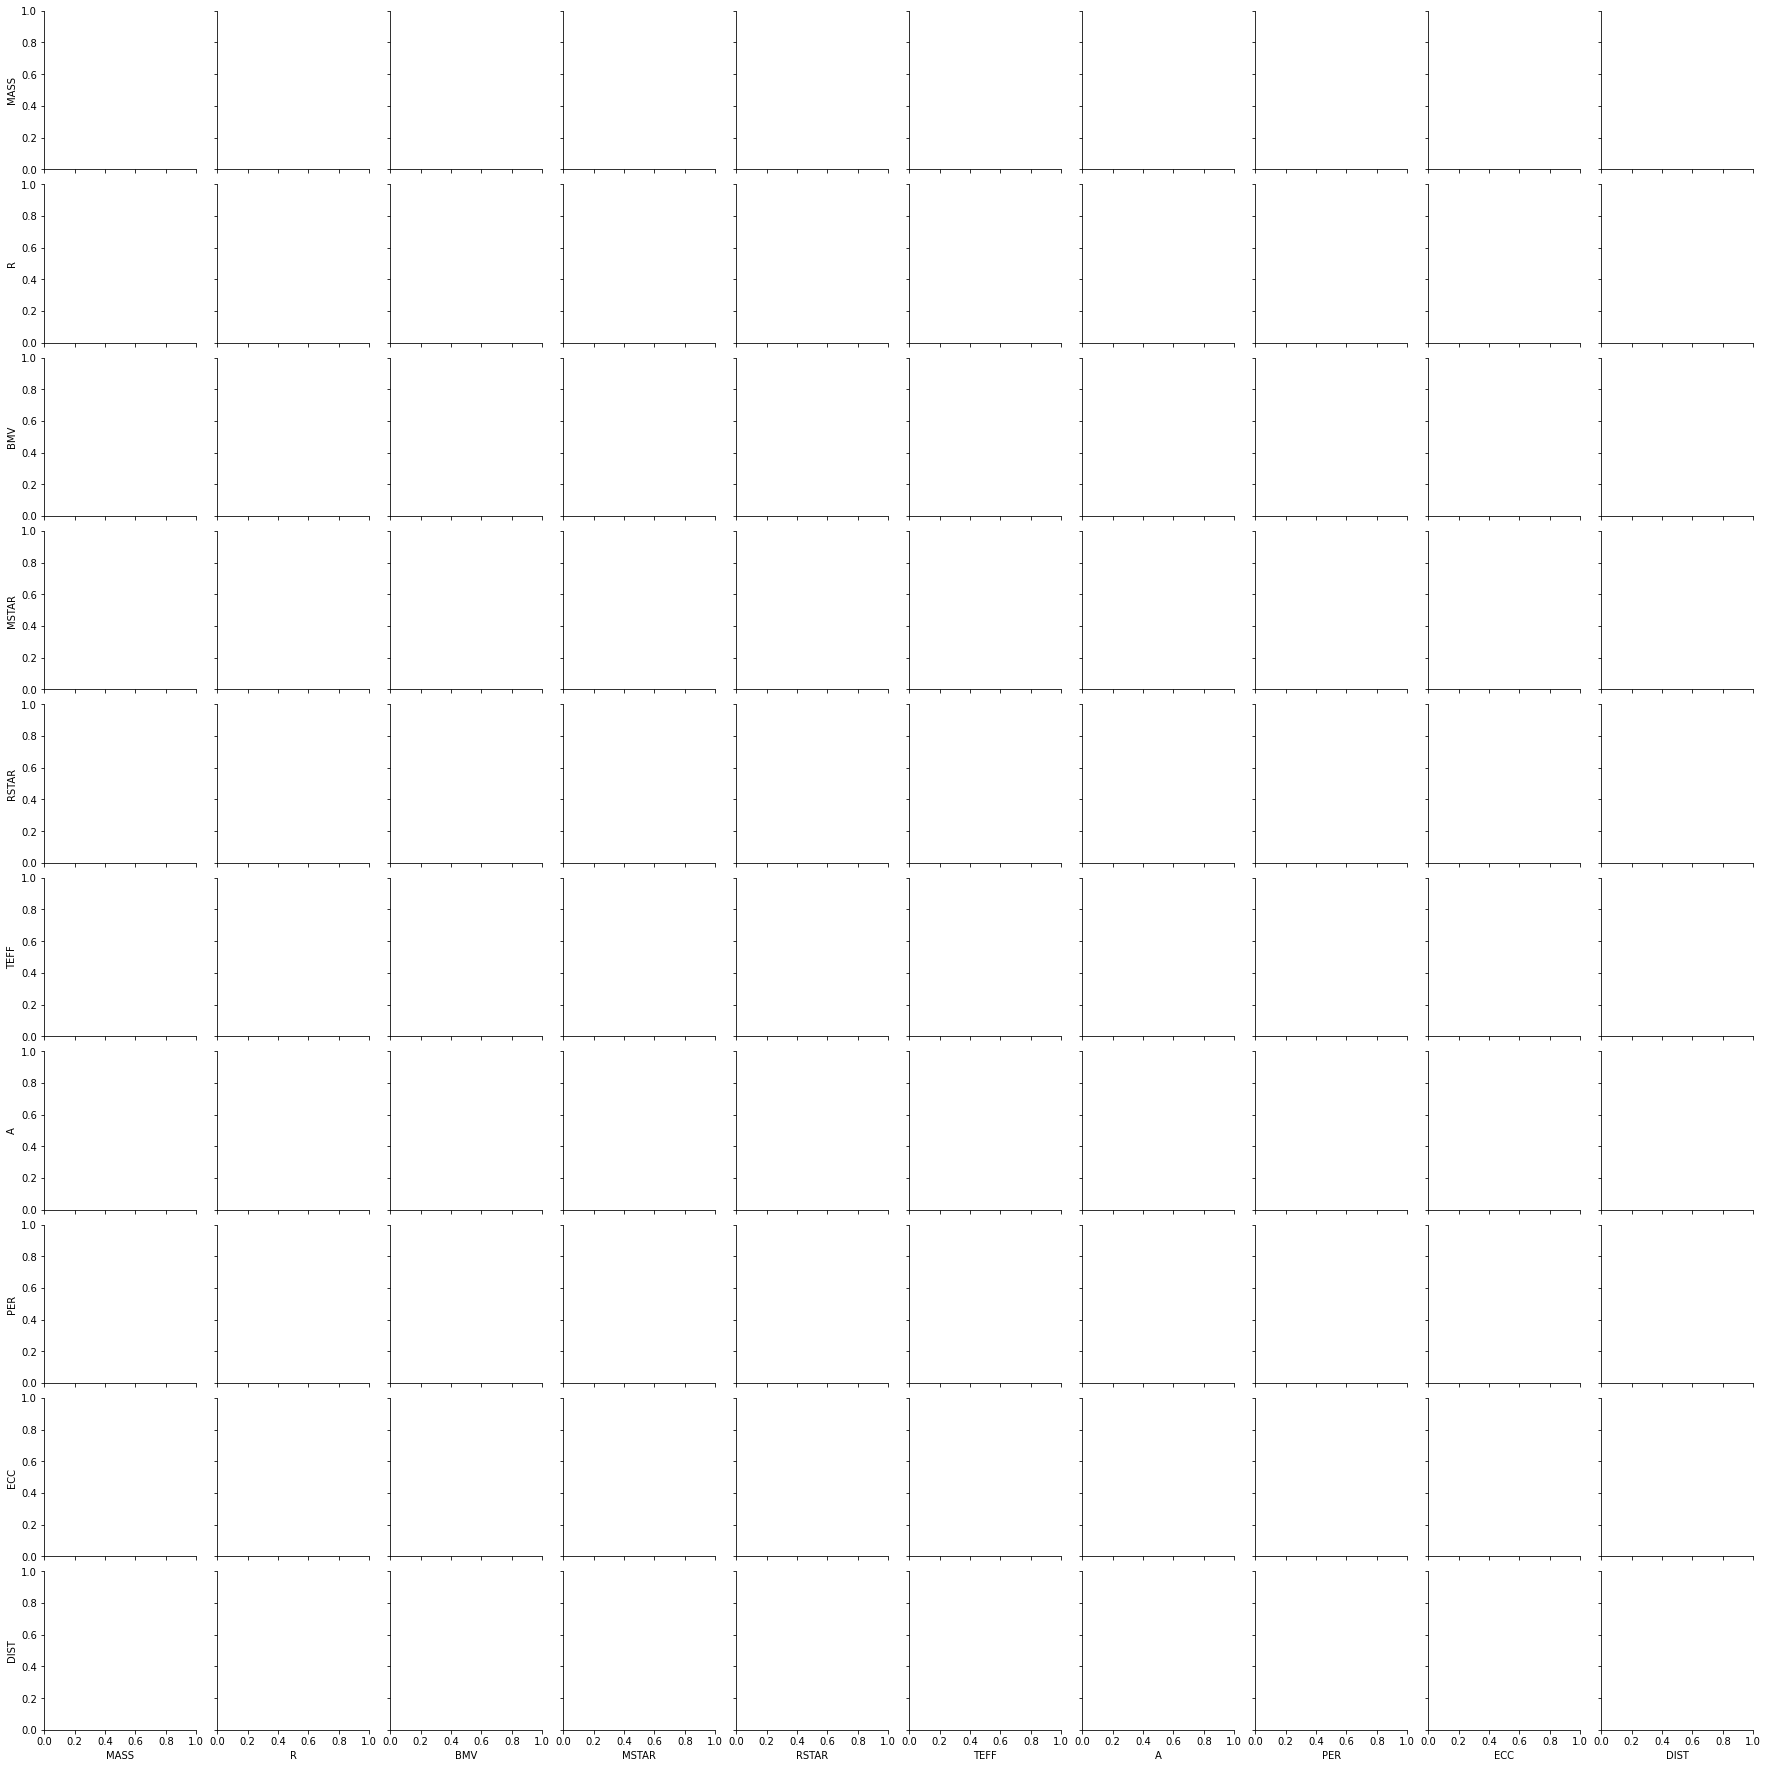

In [11]:
g = sns.PairGrid(df, hue=cat_col)
plt.show()

Y podemos ir agregando nuestro gráficos en la parte inferior.

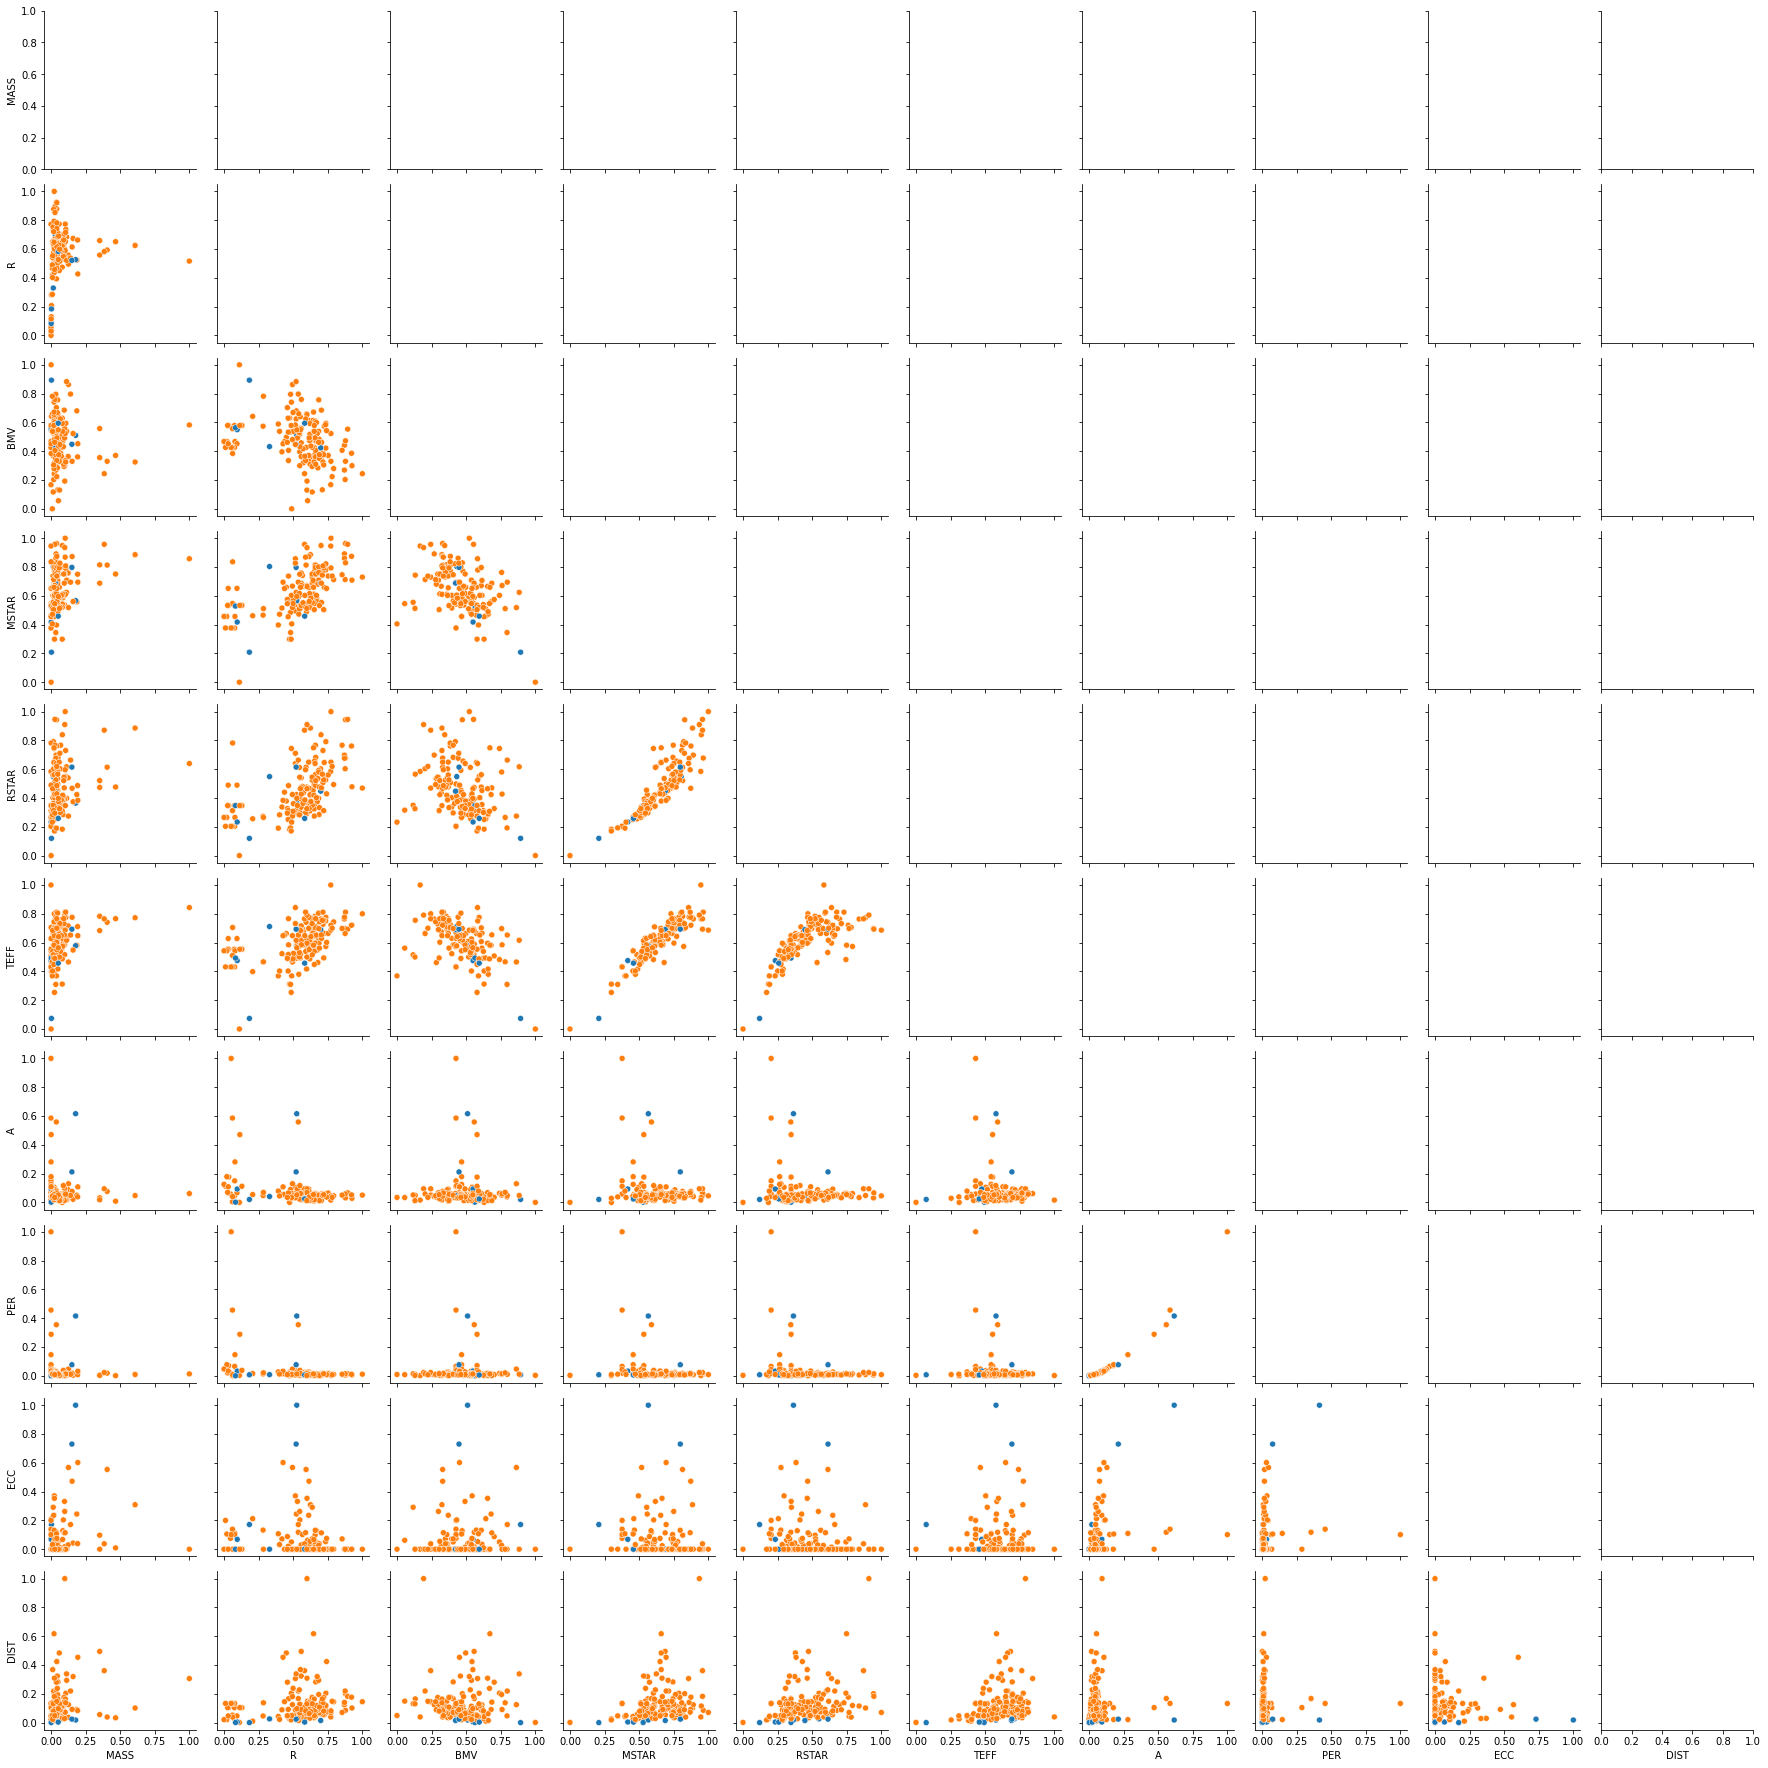

In [12]:
g = sns.PairGrid(df, hue=cat_col)
g.map_lower(sns.scatterplot)
plt.show()

En la diagonal

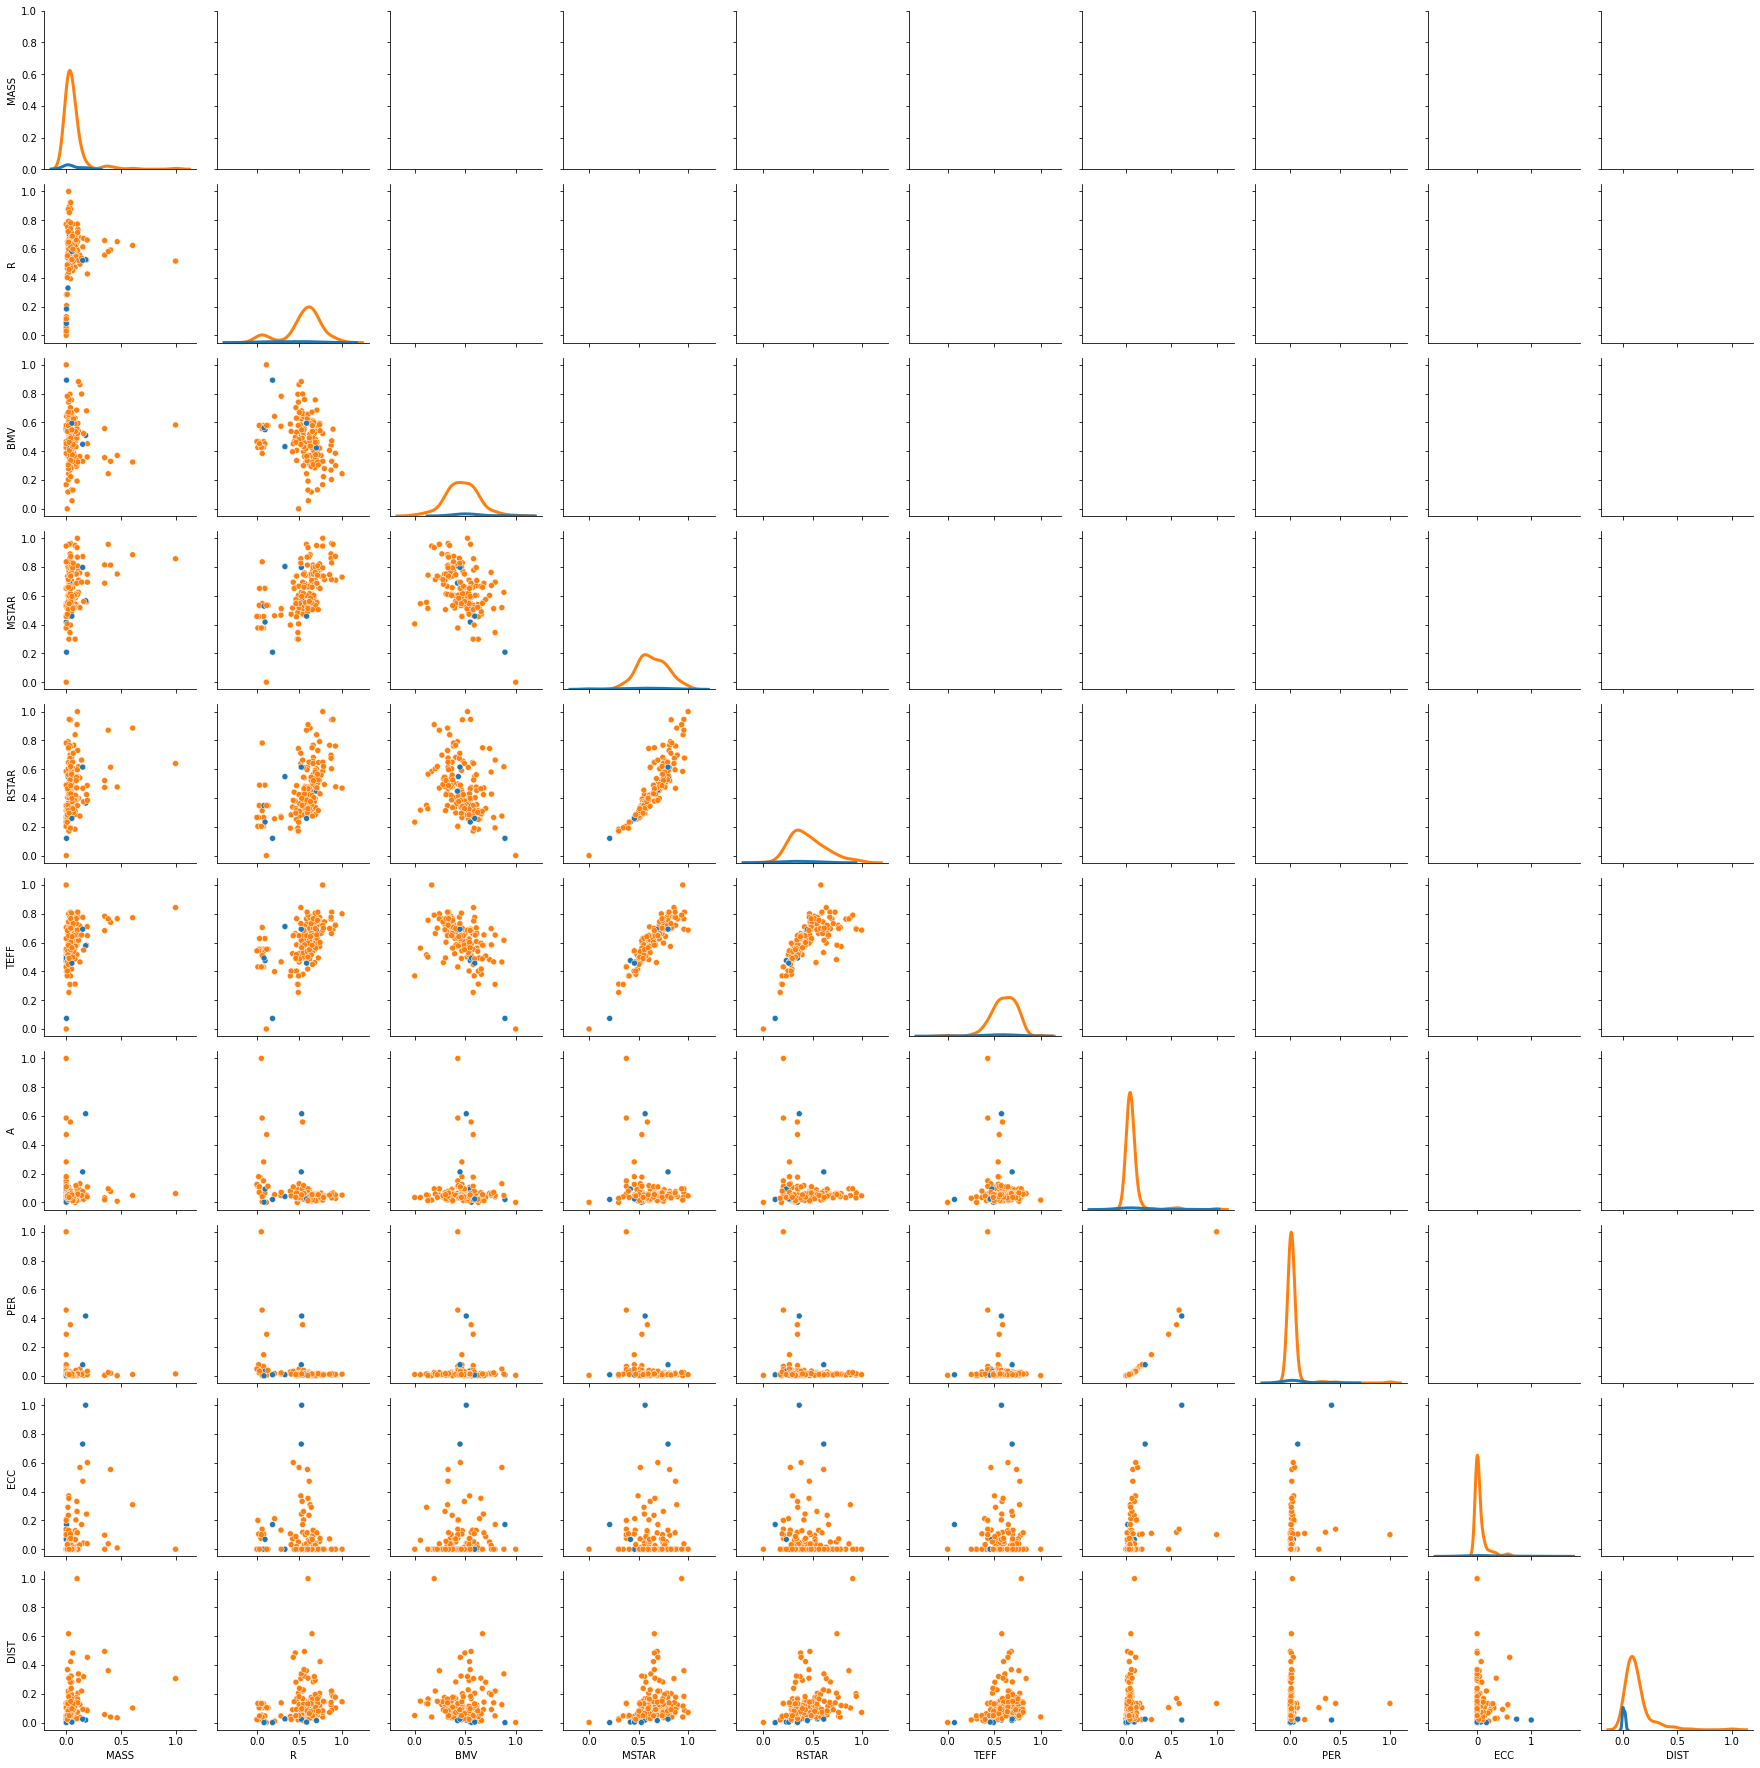

In [13]:
g = sns.PairGrid(df, hue=cat_col)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

Y en la parte superior.

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


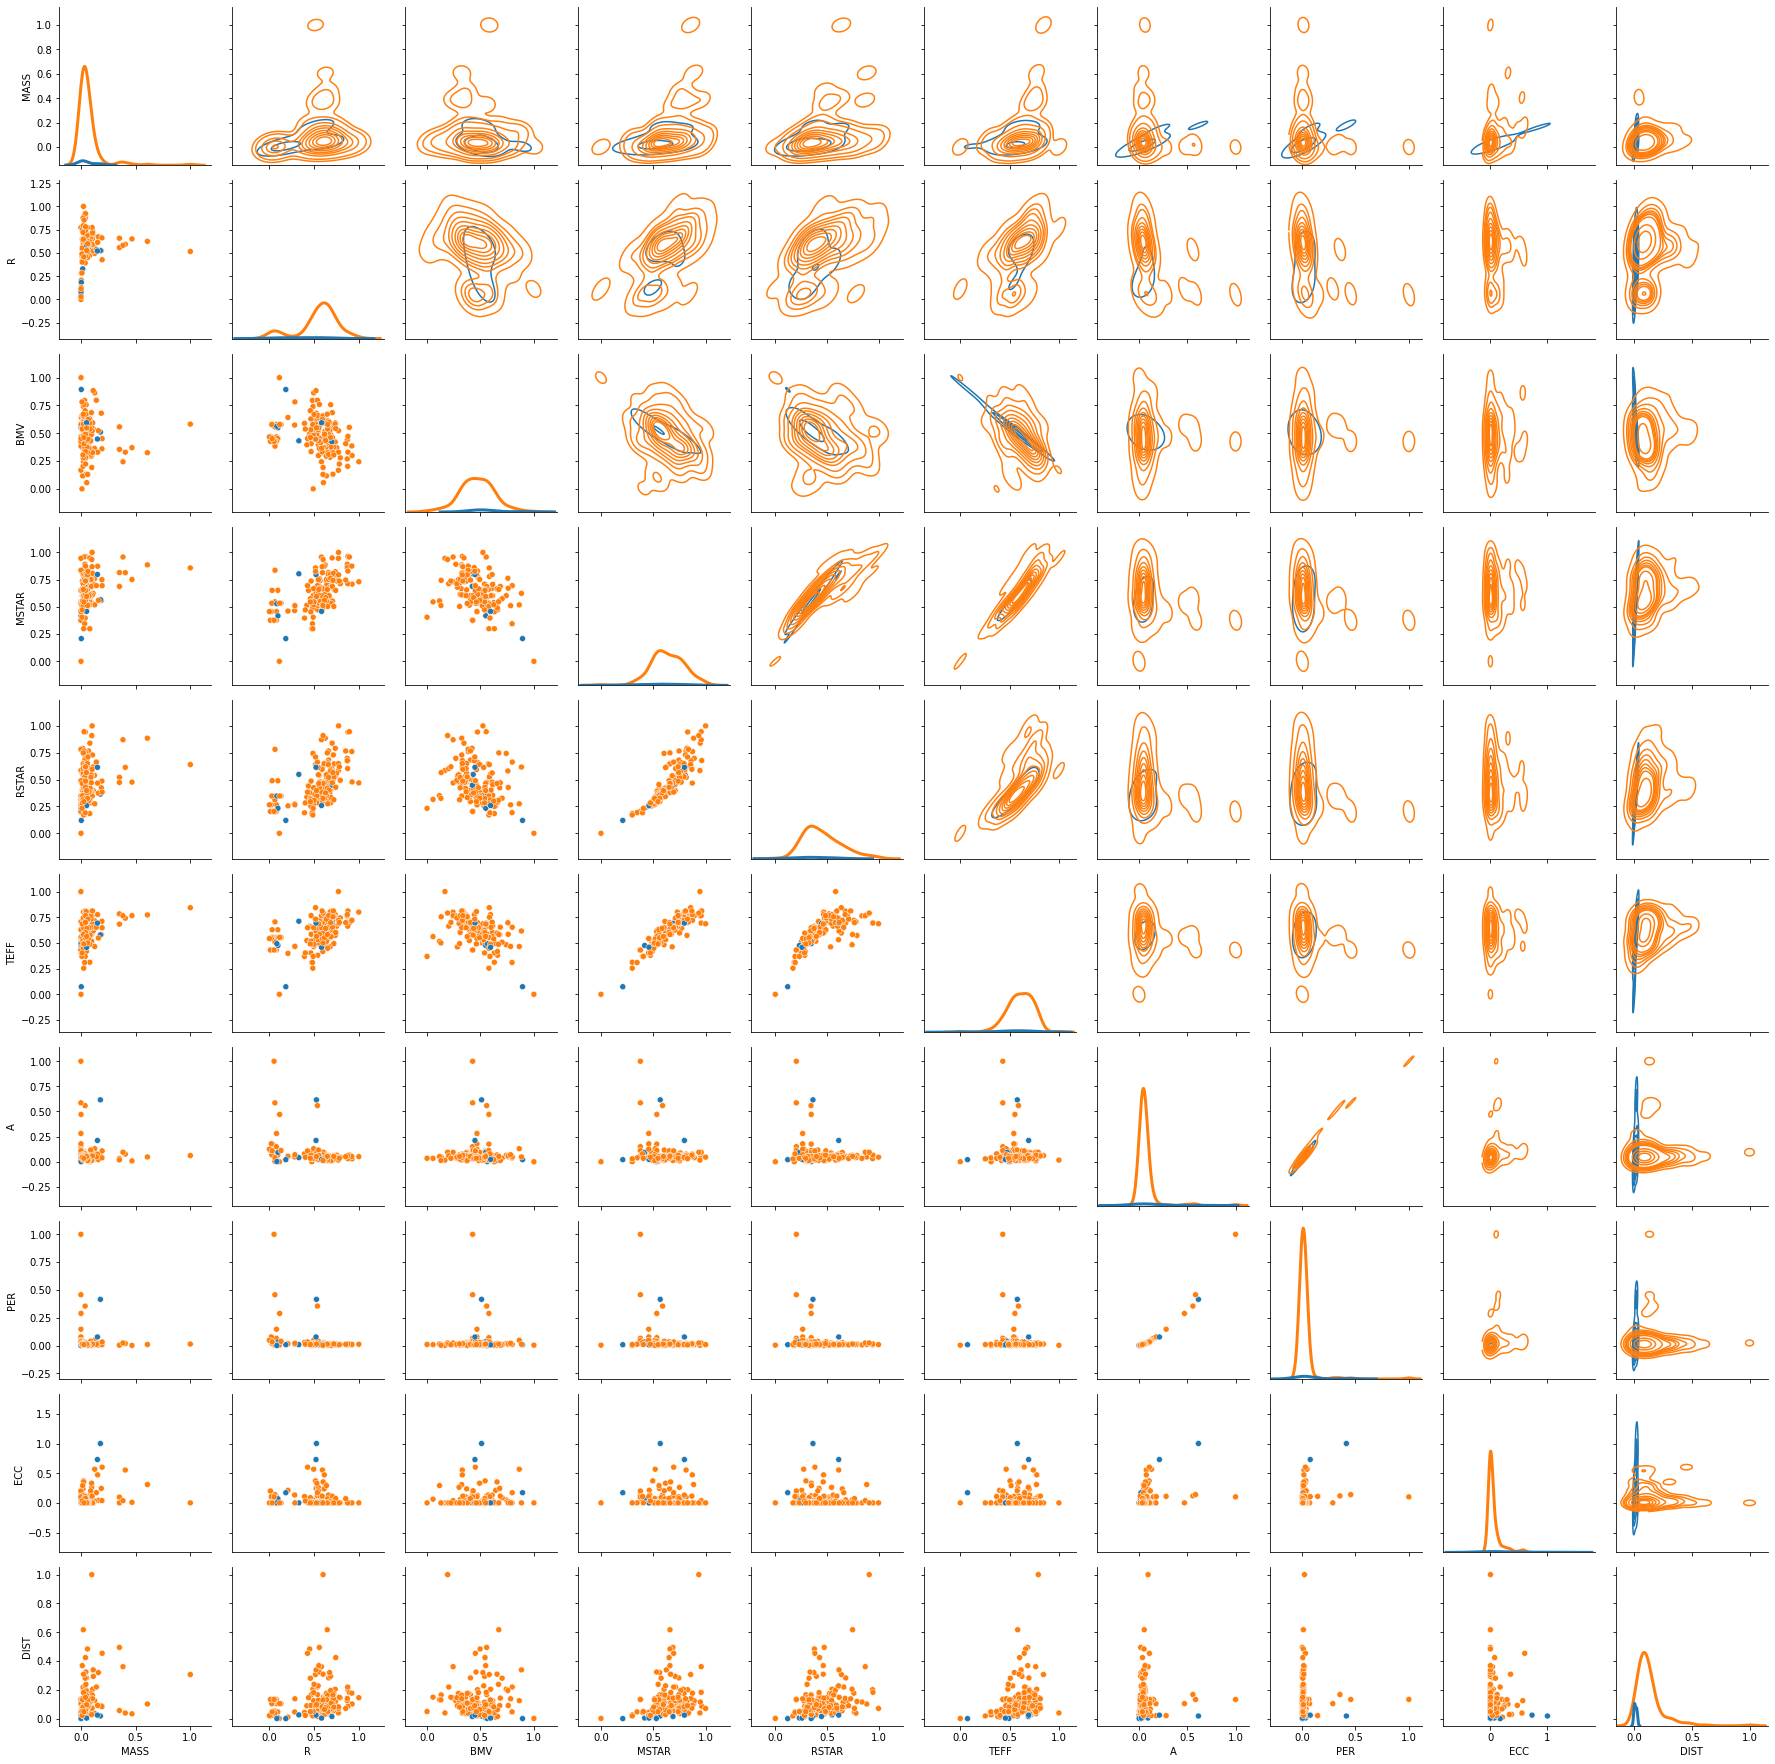

In [14]:
g = sns.PairGrid(df, hue=cat_col)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_upper(sns.kdeplot)
plt.show()

## Jerarquía

Otros tipos de datos con los que nos encontramos frecuentemente, son aquellos en los que hay algún tipo de jerarquía. Por ejemplo, grupo de grupos. Dos visualizaciones son muy comunes para ese tipo de datos: los treemaps y los círculos.

### Treemap

Para hacer un treemap necesitamos instalar el paquete `squarify`

In [15]:
import squarify

Los datos que cargaremos son los aportes a las campañas del plebiscito de este fin de semana

In [16]:
df = pd.read_excel('../data/aportes_gastos_plebiscito.xlsx', sheet_name=['Aportes', 'Propaganda por Medios Digitales', 'Medios'])
df['Aportes'].head()

,Fecha Aporte,Tipo Organización,Nombre Organización,Rut Organización,Dv Organización,Tipo Aporte,Nombre Aportante,Opcion,Monto ($)
0,2022-06-16,OSC,LAS MENTORAS,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,RECHAZO,20000
1,2022-06-23,OSC,Agrupación social Fuerza y Unión De Derechos H...,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,APRUEBO,3000
2,2022-06-26,OSC,Comando AprueboxChile,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,APRUEBO,150000
3,2022-06-28,OSC,Comando AprueboxChile,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,APRUEBO,20000
4,2022-06-28,OSC,Comando AprueboxChile,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,APRUEBO,10000


Necesitamos procesarlos un poco para que queden en un formato que nos convenga graficarlo. Para eso, calcularemos el aporte total por cada organización en la base de datos y la ordenaremos por el monto del aporte.

In [17]:
aportes = (
    df['Aportes'].groupby(['Nombre Organización', 'Opcion'])
        .agg(aporte=("Monto ($)", "sum"))
        .sort_values(['Opcion', 'aporte'], ascending=False)
        .reset_index()
)
aportes

,Nombre Organización,Opcion,aporte
0,CON MI PLATA NO - AGRUPACIÓN DE AHORRANTES PRE...,RECHAZO,151913777
1,Impulso Norte,RECHAZO,150486500
2,CHILE INFORMA,RECHAZO,134930001
3,AMARILLOS x CHILE,RECHAZO,118582242
4,ME IMPORTA CHILE,RECHAZO,118000000
...,...,...,...
142,Comisión chilena de derechos humanos de Viña d...,APRUEBO,85000
143,Comite de dd..hh. y ecologicos de Quilpue,APRUEBO,75000
144,ESIgualdad Chile,APRUEBO,60000
145,Ambientalistas por el Apruebo del Bio-Bio,APRUEBO,50000


Ocupamos `squarify` para crear nuestro primer treemap

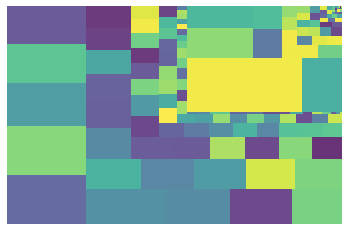

In [18]:
squarify.plot(sizes=aportes['aporte'], alpha=0.8)
plt.axis('off')
plt.show()

Necesitamos mejorarlo, para lo cual agregaremos colores y anotaciones. Tanto los colores como las anotaciones estarán dados por la fracción del aporte total correspondiente a cada opción. Para eso, primero necesitamos calcular el aporte total de cada opción, y calcular la fracción para cada organización.

In [19]:
totA = aportes[aportes['Opcion'] == 'APRUEBO']['aporte'].sum()
totR = aportes[aportes['Opcion'] == 'RECHAZO']['aporte'].sum()
aportes['porcentaje'] = aportes.apply(lambda x: x['aporte']/totA if x['Opcion'] == 'APRUEBO' else x['aporte']/totR, axis=1)
aportes.head()

,Nombre Organización,Opcion,aporte,porcentaje
0,CON MI PLATA NO - AGRUPACIÓN DE AHORRANTES PRE...,RECHAZO,151913777,0.068425
1,Impulso Norte,RECHAZO,150486500,0.067782
2,CHILE INFORMA,RECHAZO,134930001,0.060775
3,AMARILLOS x CHILE,RECHAZO,118582242,0.053412
4,ME IMPORTA CHILE,RECHAZO,118000000,0.053149


Con esos datos, calcularmos el color (en una escala de 0 a 1) para cada fila de datos.

In [20]:
pmin = aportes[aportes['Opcion'] == 'APRUEBO']['porcentaje'].min()
pmax = aportes[aportes['Opcion'] == 'APRUEBO']['porcentaje'].max()
normA = mpl.colors.Normalize(vmin=pmin, vmax=pmax)
cmapA = mpl.cm.Blues

pmin = aportes[aportes['Opcion'] == 'RECHAZO']['porcentaje'].min()
pmax = aportes[aportes['Opcion'] == 'RECHAZO']['porcentaje'].max()
normR = mpl.colors.Normalize(vmin=pmin, vmax=pmax)
cmapR = mpl.cm.Reds

aportes['norm'] = aportes.apply(lambda x: normA(x['porcentaje']) if x['Opcion'] == 'APRUEBO' else normR(x['porcentaje']), axis=1)
aportes['color'] = aportes.apply(lambda x: cmapA(x['norm']) if x['Opcion'] == 'APRUEBO' else cmapR(x['norm']), axis=1)
aportes.head()


,Nombre Organización,Opcion,aporte,porcentaje,norm,color
0,CON MI PLATA NO - AGRUPACIÓN DE AHORRANTES PRE...,RECHAZO,151913777,0.068425,1.000000,"(0.403921568627451, 0.0, 0.05098039215686274, ..."
1,Impulso Norte,RECHAZO,150486500,0.067782,0.990603,"(0.4191772395232603, 0.0036908881199538626, 0...."
2,CHILE INFORMA,RECHAZO,134930001,0.060775,0.888179,"(0.6175009611687813, 0.05167243367935409, 0.07..."
3,AMARILLOS x CHILE,RECHAZO,118582242,0.053412,0.780546,"(0.7598462129950019, 0.0855363321799308, 0.106..."
4,ME IMPORTA CHILE,RECHAZO,118000000,0.053149,0.776712,"(0.7645213379469434, 0.08664359861591696, 0.10..."


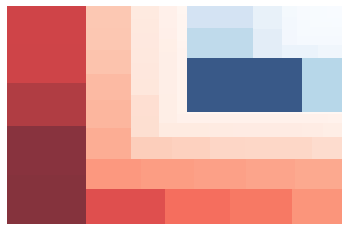

In [21]:
squarify.plot(sizes=aportes['aporte'], color=aportes['color'], alpha=0.8)
plt.axis('off')
plt.show()

Ahora calculamos las anotaciones que incluiremos, basándonos en un valor de corte que llamaremos `threshold`.

In [22]:
threshold = 0.5
aportes['nombre'] = aportes.apply(lambda x: x['Nombre Organización'].split('-')[0] if x['norm'] > threshold else '', axis=1)

Agregamos las anotaciones.

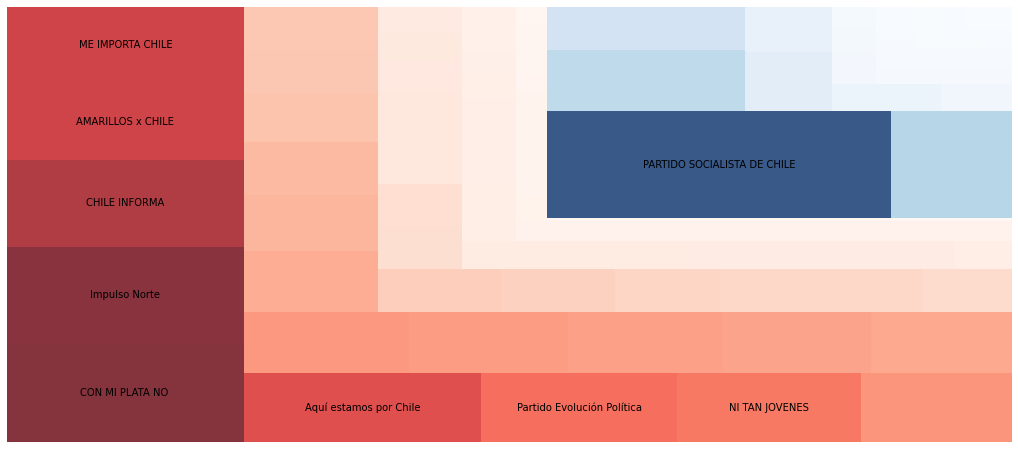

In [23]:
fig, ax = plt.subplots(1,1, figsize=(18, 8))

squarify.plot(sizes=aportes['aporte'], color=aportes['color'], label=aportes['nombre'], alpha=0.8, ax=ax)
plt.axis('off')
plt.show()

Finalmente graficamos todo.

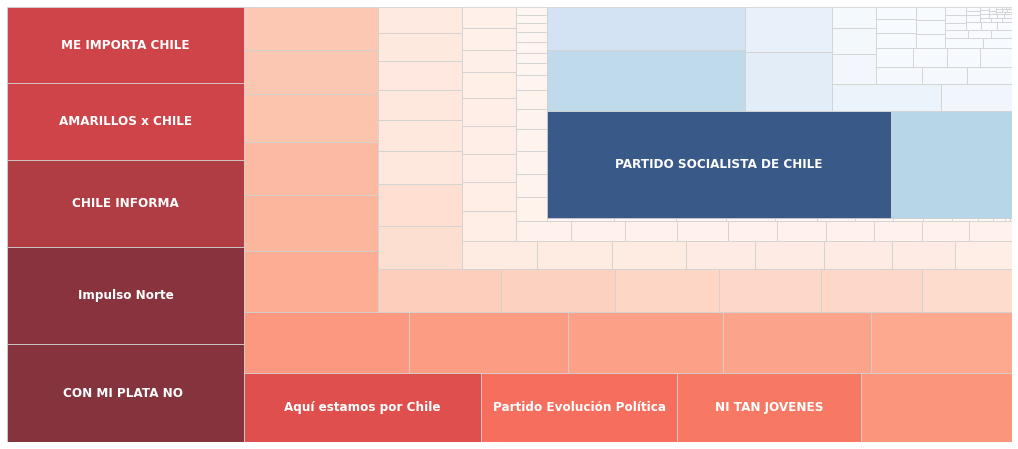

In [24]:
fig, ax = plt.subplots(1,1, figsize=(18, 8))

squarify.plot(sizes=aportes['aporte'], color=aportes['color'], label=aportes['nombre'], alpha=0.8, ax=ax,
             text_kwargs={'fontsize': 12, 'color': 'white', 'weight': 'bold'}, edgecolor='#d2d2d2')
plt.axis('off')
plt.show()

### Círculos

Algo parecido podemos hacer pero ahora con círculos. Para ello usaremos datos de población mundial, en format json.

In [25]:
data = [{'id': 'World', 'datum': 6964195249, 'children' : [
              {'id' : "North America", 'datum': 450448697,
                   'children' : [
                     {'id' : "United States", 'datum' : 308865000},
                     {'id' : "Mexico", 'datum' : 107550697},
                     {'id' : "Canada", 'datum' : 34033000} 
                   ]},
              {'id' : "South America", 'datum' : 278095425, 
                   'children' : [
                     {'id' : "Brazil", 'datum' : 192612000},
                     {'id' : "Colombia", 'datum' : 45349000},
                     {'id' : "Argentina", 'datum' : 40134425}
                   ]},
              {'id' : "Europe", 'datum' : 209246682,  
                   'children' : [
                     {'id' : "Germany", 'datum' : 81757600},
                     {'id' : "France", 'datum' : 65447374},
                     {'id' : "United Kingdom", 'datum' : 62041708}
                   ]},
              {'id' : "Africa", 'datum' : 311929000,  
                   'children' : [
                     {'id' : "Nigeria", 'datum' : 154729000},
                     {'id' : "Ethiopia", 'datum' : 79221000},
                     {'id' : "Egypt", 'datum' : 77979000}
                   ]},
              {'id' : "Asia", 'datum' : 2745929500,  
                   'children' : [
                     {'id' : "China", 'datum' : 1336335000},
                     {'id' : "India", 'datum' : 1178225000},
                     {'id' : "Indonesia", 'datum' : 231369500}
                   ]}
    ]}]

Necesitamos instalar el paquete `circlify`

In [26]:
import circlify

Y lo ocupamos para calcular los círculos

In [27]:
circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
circles

[Circle(x=0.0, y=0.0, r=1.0, level=1, ex={'id': 'World', 'datum': 6964195249, 'children': [{'id': 'North America', 'datum': 450448697, 'children': [{'id': 'United States', 'datum': 308865000}, {'id': 'Mexico', 'datum': 107550697}, {'id': 'Canada', 'datum': 34033000}]}, {'id': 'South America', 'datum': 278095425, 'children': [{'id': 'Brazil', 'datum': 192612000}, {'id': 'Colombia', 'datum': 45349000}, {'id': 'Argentina', 'datum': 40134425}]}, {'id': 'Europe', 'datum': 209246682, 'children': [{'id': 'Germany', 'datum': 81757600}, {'id': 'France', 'datum': 65447374}, {'id': 'United Kingdom', 'datum': 62041708}]}, {'id': 'Africa', 'datum': 311929000, 'children': [{'id': 'Nigeria', 'datum': 154729000}, {'id': 'Ethiopia', 'datum': 79221000}, {'id': 'Egypt', 'datum': 77979000}]}, {'id': 'Asia', 'datum': 2745929500, 'children': [{'id': 'China', 'datum': 1336335000}, {'id': 'India', 'datum': 1178225000}, {'id': 'Indonesia', 'datum': 231369500}]}]}),
 Circle(x=-0.1891573044970616, y=0.7725949609

Una vez que tenemos todos los datos de los círculos los graficamos.

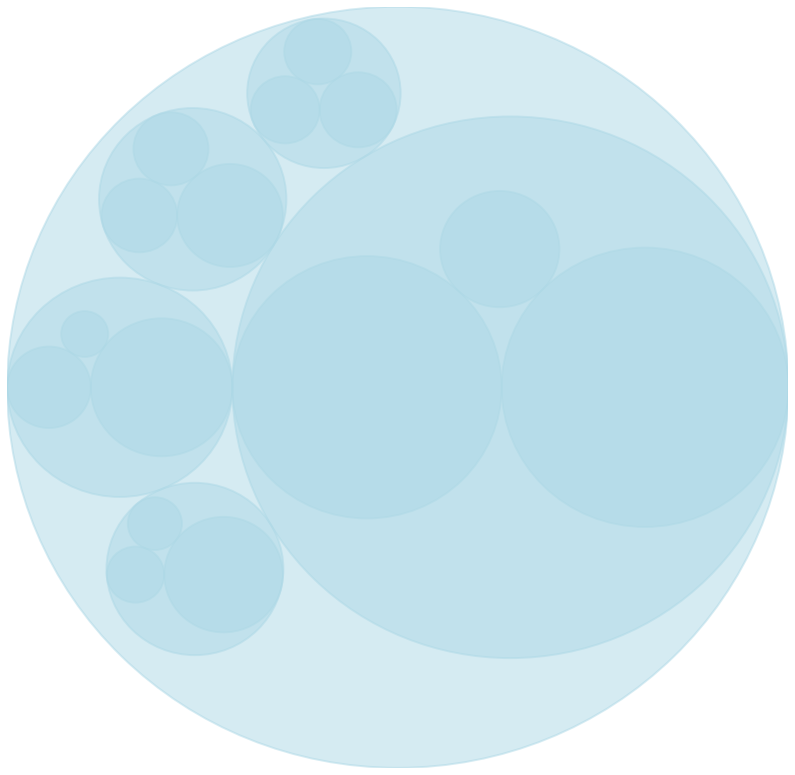

In [28]:
fig, ax = plt.subplots(figsize=(14,14))

ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r
    )
    for circle in circles
)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x,y), r, alpha=0.5, linewidth=2, color='lightblue'))

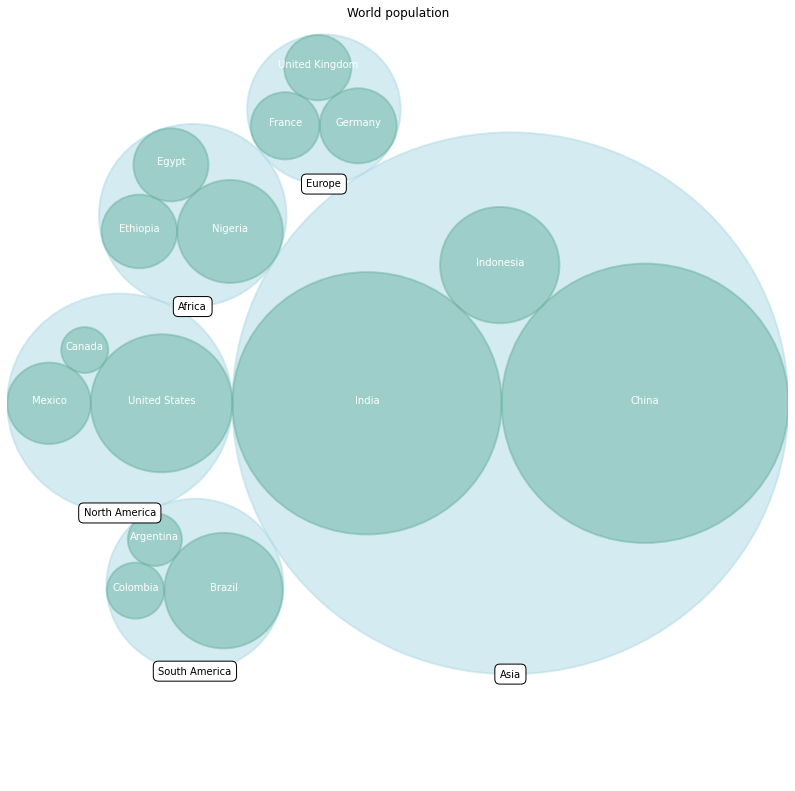

In [29]:
fig, ax = plt.subplots(figsize=(14,14))

ax.set_title("World population")

ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    ax.add_patch(plt.Circle((x,y), r, alpha=0.5, linewidth=2, color='lightblue'))
                 
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex['id']
    ax.add_patch(plt.Circle((x,y), r, alpha=0.5, linewidth=2, color='#69b3a2'))
    plt.annotate(label, (x,y), ha='center', color='white')

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y-r) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

## Flujos

### Streamgraph

El streamgraph consiste básicamente en un stacked area chart suavizado. Para la parte de suavizar el gráfico será necesatio ocupar `scipy`.

In [30]:
from scipy import stats

Partamos creando datos aleatorios

In [31]:
x = np.arange(1990, 2020)
y = [np.random.randint(0, 5, size=30) for _ in range(5)]

Y creemos un stacked area chart

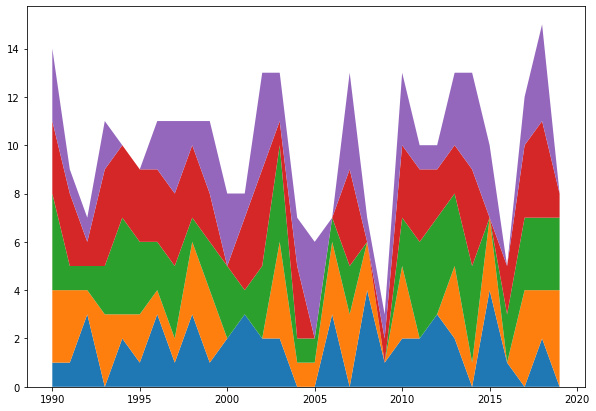

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x, y)

Para un streamgraph es necesario mover el gráfico de tal forma que el eje x se ubique a la mitad del gráfico.

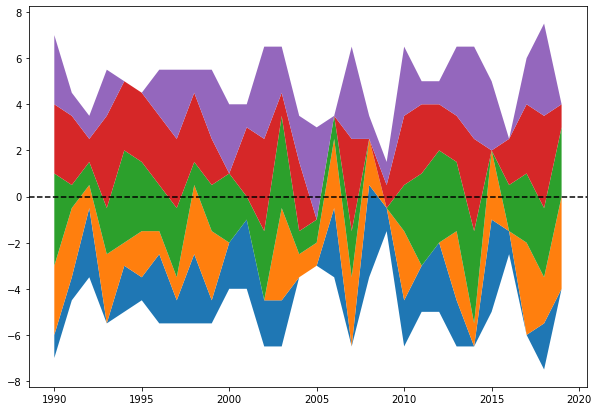

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x, y, baseline='sym')
ax.axhline(0, color="black", ls="--")

Para suavizar la curva ocuparemos una función `stats.norm.pdf` que se ocupa de la siguiente manera:

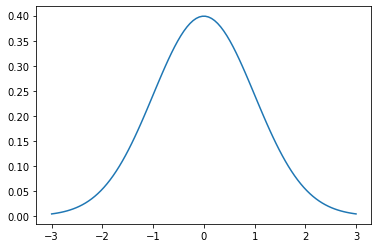

In [34]:
grid = np.linspace(-3,3, num=100)

plt.plot(grid, stats.norm.pdf(grid))

Entonces podemos definir una función que nos calcula la versión suavizada de cualquier serie de datos.

In [35]:
def gaussian_smooth(x, y, sd):
    weights = np.array([stats.norm.pdf(x, m, sd) for m in x])
    weights = weights / weights.sum(1)
    return (weights * y).sum(1)

Y ocupamos eso para suavizar nuestros datos iniciales

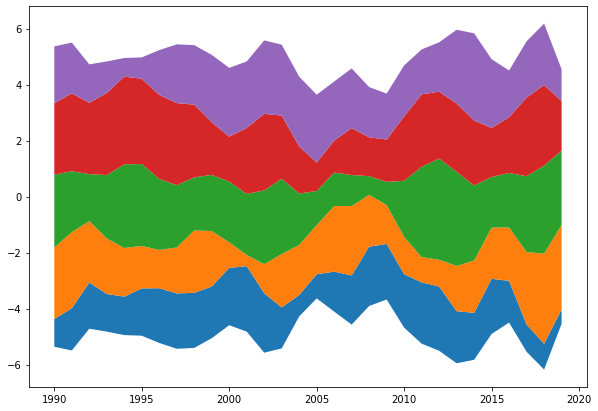

In [36]:
fig, ax = plt.subplots(figsize=(10, 7))
y_smoothed = [gaussian_smooth(x, y_, 1) for y_ in y]

ax.stackplot(x, y_smoothed, baseline='sym')

No está tan suave aún, por lo que ampliamos la función para recibir cualquier grilla (resolución) y así lograr una mejor curva.

In [37]:
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

Y ahora la aplicamos a nuestros datos

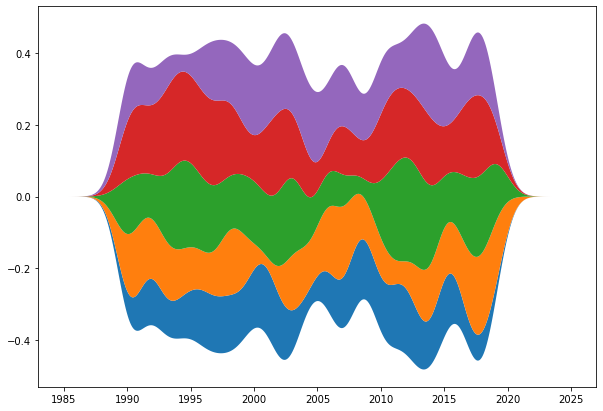

In [38]:
fig, ax = plt.subplots(figsize=(10, 7))
grid = np.linspace(1985, 2025, num=500)
y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]
ax.stackplot(grid, y_smoothed, baseline="sym");

Podemos comparar cómo se ven dos curvas con distinta resolución para tener una idea de como funcionan esos parámetros

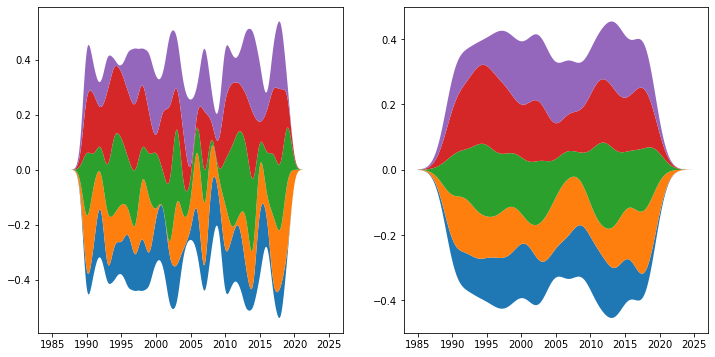

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# sd of 0.6
y_smoothed_1 = [gaussian_smooth(x, y_, grid, 0.6) for y_ in y]
# sd of 1.5
y_smoothed_2 = [gaussian_smooth(x, y_, grid, 1.5) for y_ in y]

ax[0].stackplot(grid, y_smoothed_1, baseline="sym")
ax[1].stackplot(grid, y_smoothed_2, baseline="sym")

### Diagrama de Sankey

Por último, veremos cómo hacer un diagrama de Sankey. Para esto, necesitamos instalar el paquete `pysankey`.

In [40]:
from pySankey.sankey import sankey

Cargamos unos de los datos que vienen de ejemplo

In [41]:
url = "https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/fruits.txt"
df = pd.read_csv(url, sep=" ", names=["true", "predicted"])
df.head()

,true,predicted
0,blueberry,blueberry
1,apple,blueberry
2,blueberry,blueberry
3,lime,lime
4,orange,orange


Y los graficamos

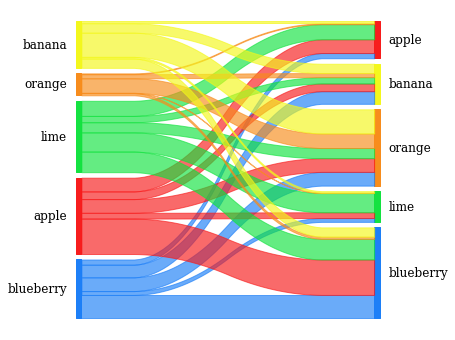

In [42]:
colors = {
    "apple": "#f71b1b",
    "blueberry": "#1b7ef7",
    "banana": "#f3f71b",
    "lime": "#12e23f",
    "orange": "#f78c1b"
}

sankey(df['true'], df['predicted'], aspect=20, colorDict=colors, fontsize=12)

Podemos agregarle pesos. Para eso carguemos una nueva serie de datos.

In [43]:
url = "https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/customers-goods.csv"
df = pd.read_csv(url, sep=",")
df.head()

,Unnamed: 0,customer,good,revenue
0,0,John,fruit,5.5
1,1,Mike,meat,11.0
2,2,Betty,drinks,7.0
3,3,Ben,fruit,4.0
4,4,Betty,bread,2.0


Y usemos los pesos para ambos lados del diagrama.

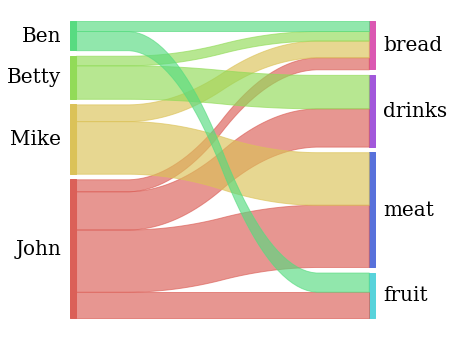

In [44]:
sankey(
    left=df["customer"], right=df["good"], 
    leftWeight= df["revenue"], rightWeight=df["revenue"], 
    aspect=20, fontsize=20
)

Un muy buen recurso para ver estos tipos de gráficos y más es la [galería de gráficos de python](https://www.python-graph-gallery.com)